In [10]:
import json
import csv
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, ensemble, tree
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit, train_test_split
import geopy
from geopy.distance import lonlat, distance,geodesic

yelp = []
with open('phoenix_yelp.json') as f:
    for line in f:
        yelp.append(json.loads(line))
yelp = pd.DataFrame(yelp)
zillow = pd.read_csv('phoenix_zillow.csv')
zillow['count_zillow'] = 1
school = pd.read_csv('phoenix_schools.csv')
school['count_school'] = 1
school['private_school'] = [1 if t == 'private' else 0 for t in school.type]
school['public_school'] = [1 if t == 'public' else 0 for t in school.type]
school['charter_school'] = [1 if t == 'charter' else 0 for t in school.type]
#data combining
for c in ['lat','lon']:
    school[c] = school[c].apply(lambda x: round(x,2))

for c in ['Lat','Lon']:
    zillow[c] = zillow[c].apply(lambda x: round(x,3))
    #zillow[c + '_2'] = zillow[c].apply(lambda x: round(x,2))
for c in ['latitude','longitude']:
    yelp[c] = yelp[c].apply(lambda x: round(x,3))
    #yelp[c + '_2'] = yelp[c].apply(lambda x: round(x,2))
#print(zillow)
zillow_priceagg = zillow.groupby(['Lat','Lon'])[["count_zillow","Property Size", 
                                                 "Zestimate","Bathrooms","Bedrooms",
                                                 "Year Built"]].sum().reset_index()
zillow_priceagg['avg_price'] = zillow_priceagg['Zestimate']/zillow_priceagg['Property Size']
yelp['count_yelp'] = 1

yelp_agg = yelp.groupby(['latitude','longitude'])[["review_count","stars",
                                                   "count_yelp"]].sum().reset_index()
yelp_agg['avg_review'] = yelp_agg['review_count']/yelp_agg['count_yelp']
yelp_agg['avg_stars'] = yelp_agg['stars']/yelp_agg['count_yelp']
zillow_priceagg['avg_Bathroom'] = zillow_priceagg['Bathrooms']/zillow_priceagg['count_zillow']
zillow_priceagg['avg_Bedroom'] = zillow_priceagg['Bedrooms']/zillow_priceagg['count_zillow']

school_agg1 = school.groupby(['lat','lon'])[["count_school","enrollment",
                                             "private_school","public_school",
                                             "charter_school"]].sum().reset_index()
school_agg1['total_school'] = school_agg1['private_school']+school_agg1['public_school']+school_agg1['charter_school']

data = pd.merge(zillow_priceagg,yelp_agg,how = 'left',left_on = ['Lat','Lon'],right_on =['latitude','longitude'])

data1 = data.replace(np.nan,0).dropna()

# data1['public_school'] = 0
# data1['private_school'] = 0
# data1['charter_school'] = 0
# school_agg2 = school_agg1[school_agg1.total_school>0]
# for i in range(0,len(data1)):
#     d1 = data1.iloc[[i]]
#     #print(d1)
#     point1 = (d1.Lat.iloc[0],d1.Lon.iloc[0])
#     for s in range(0,len(school_agg2)):
#         d2 = school_agg1.iloc[[s]]
#         point2 = (d2.lat.iloc[0],d2.lon.iloc[0])
#         dist = geopy.distance.vincenty(point1,point2).miles
#         print(dist)
#         if dist <= 5:
#             for c in ['private','public','charter']:
#                 #print(data1.iloc[[i]]['private_school'])
#                 data1.loc[[i]][c + '_school'] += d2[c + '_school'].iloc[0]
            
                
        
#print(data1)       
        
# #data1 = pd.merge(data,school_agg1,how = 'left',left_on = ['Lat_1','Lon_1'],right_on =['lat','lon'])

data2 = data1.replace([np.inf, -np.inf], np.nan).dropna()
var = data2.drop(['Lat','Lon','count_zillow',
                  'Bathrooms','avg_Bedroom','count_yelp',
                  'longitude','latitude','review_count'], axis = 1)
#len(var[var.enrollment>0])
var







,Property Size,Zestimate,Bedrooms,Year Built,avg_price,avg_Bathroom,stars,avg_review,avg_stars
0,5610.0,344068.0,4.0,2004.0,61.331194,2.50,0.0,0.0,0.0
1,6804.0,319052.0,0.0,1992.0,46.891828,2.67,0.0,0.0,0.0
2,995092.0,1809560.0,0.0,0.0,1.818485,0.00,0.0,0.0,0.0
3,7337.0,373576.0,0.0,1993.0,50.916723,2.67,0.0,0.0,0.0
5,6873.0,348589.0,3.0,2001.0,50.718609,2.00,0.0,0.0,0.0
6,4684.0,321891.0,0.0,2015.0,68.721392,2.67,5.0,6.0,5.0
7,5239.0,310388.0,3.0,1990.0,59.245658,2.00,0.0,0.0,0.0
8,8729.0,426698.0,4.0,1990.0,48.882804,2.50,0.0,0.0,0.0
9,5497.0,334543.0,4.0,1995.0,60.859196,2.50,0.0,0.0,0.0
10,6482.0,364200.0,0.0,1992.0,56.186362,3.00,0.0,0.0,0.0


In [11]:
data

,Lat,Lon,count_zillow,Property Size,Zestimate,Bathrooms,Bedrooms,Year Built,avg_price,avg_Bathroom,avg_Bedroom,latitude,longitude,review_count,stars,count_yelp,avg_review,avg_stars
0,33.292,-112.121,1,5610.0,344068.0,2.50,4.0,2004.0,61.331194,2.50,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.293,-112.049,1,6804.0,319052.0,2.67,0.0,1992.0,46.891828,2.67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.293,-112.035,2,995092.0,1809560.0,0.00,0.0,0.0,1.818485,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33.293,-112.006,1,7337.0,373576.0,2.67,0.0,1993.0,50.916723,2.67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.293,-111.992,1,0.0,357451.0,2.33,0.0,2001.0,inf,2.33,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,33.293,-111.987,1,6873.0,348589.0,2.00,3.0,2001.0,50.718609,2.00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,33.294,-112.099,1,4684.0,321891.0,2.67,0.0,2015.0,68.721392,2.67,0.0,33.294,-112.099,6.0,5.0,1.0,6.0,5.0
7,33.294,-112.055,1,5239.0,310388.0,2.00,3.0,1990.0,59.245658,2.00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,33.294,-112.047,1,8729.0,426698.0,2.50,4.0,1990.0,48.882804,2.50,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,33.294,-112.030,1,5497.0,334543.0,2.50,4.0,1995.0,60.859196,2.50,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#plt.scatter(data.avg_review,data.avg_price)
#plt.scatter(data['avg_stars'],data.Zestimate)
#linregress(data['avg_review'],data.avg_price)
#data = data.replace([np.inf, -np.inf], np.nan).dropna()
#var = data[['avg_review','avg_stars','count','review_count']]
#data

In [13]:
#model building
X_train, X_test, y_train, y_test = train_test_split(var, var.avg_price,test_size=0.2) 
#X_train = np.array(X_train)
#y_train.fillna(y_train.mean)
#X_test = np.array(X_test)
#y_test.fillna(y_test.mean)


print (X_train.shape, X_test.shape) 
gbrt=ensemble.GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 

y_pred=gbrt.predict(X_test)
print ("Feature Importances")
print (gbrt.feature_importances_)

#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is
#able to decipher.
print ("R-squared for Train: %.2f" %gbrt.score(X_train, y_train))
print ("R-squared for Test: %.2f" %gbrt.score(X_test, y_test))

def GradientBooster(param_grid, n_jobs): 
    estimator = ensemble.GradientBoostingRegressor() 
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2) 
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) 
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_) 
    return(cv,classifier.best_estimator_) 

(1140, 9) (285, 9)
Feature Importances
[1.28726097e-02 4.20514908e-03 6.60174546e-04 2.91278374e-04
 9.80969472e-01 1.00131646e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
R-squared for Train: 1.00
R-squared for Test: 0.40


In [14]:
param_grid={'n_estimators':[100],
            'learning_rate': [0.05],
            'max_depth':[4],
            'min_samples_leaf':[3],
            'max_features':[0.3] 
           }
n_jobs=4 
cv,best_est=GradientBooster(param_grid, n_jobs)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [15]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.datasets import load_digits 
from sklearn.learning_curve import learning_curve 

def plot_learning_curve(estimator, title, X, y, ylim=None, 
                        cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    plt.figure() 
    plt.title(title) 
    if ylim is not None: 
        plt.ylim(*ylim) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, 
                                                                cv=cv, n_jobs=n_jobs, 
                                                                train_sizes=train_sizes) 
    print(train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                         train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                         test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 
    return(plt) 


[ 91 296 501 706 912]


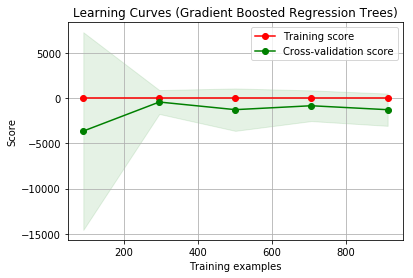

In [16]:
title = "Learning Curves (Gradient Boosted Regression Trees)" 
estimator = ensemble.GradientBoostingRegressor(n_estimators=best_est.n_estimators, 
                                               max_depth=best_est.max_depth, 
                                               learning_rate=best_est.learning_rate, 
                                               min_samples_leaf=best_est.min_samples_leaf, 
                                               max_features=best_est.max_features) 
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=n_jobs) 
plt.show() 

In [17]:
estimator = best_est 
estimator.fit(X_train, y_train) 
print("Train R-squared: %.2f" %estimator.score(X_train, y_train)) 
print("Test R-squared: %.2f" %estimator.score(X_test, y_test)) 

Train R-squared: 0.88
Test R-squared: -226.03
